## **Name: Yusuf Elnady**

 # Some Needed Imports 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

# Implementing Logistic Regression from Scratch (Newton's Method)

In [195]:
sys.path.append('/content/drive/data/')
trains_X=[]  
trains_Y=[]
for i in range(10):
    trains_X.append(pd.read_csv('/content/drive/My Drive/data/knn-dataset/trainData'+str(i+1)+'.csv', header=None).values)
    trains_Y.append(pd.read_csv('/content/drive/My Drive/data/knn-dataset/trainLabels'+str(i+1)+'.csv',header=None).values)

    
#Reading the Linear Regression test data    
test_input = pd.read_csv('/content/drive/My Drive/data/knn-dataset/testData.csv',header=None).values
test_target=  pd.read_csv('/content/drive/My Drive/data/knn-dataset/testLabels.csv',header=None).values

In [196]:
def sigmoid(x):
  return 1 / (np.exp(-x) + 1)

#return will be a squared matrix of all second derivatives of the weights
def hessian_inversed(W,X,lambdaa):
  sig = sigmoid(np.dot(X,W)) #The same as (X @ W)
  H = X.T.dot(np.diag(sig*(1-sig))).dot(X) #XRX^T
  H = H + lambdaa * np.identity(len(H)) #The regulatization part
  return np.linalg.inv(H) #Inverse of the hessian matrix

#Here we calculate the derivative of L(w), we already have a formula for it
def gradient(W,X,Y,lambdaa):
  y = [0 if i == 5 else 1 for i in Y] #convert the classes to be only (0) if (5), (1) if (6)
  g = ( sigmoid(np.dot(X,W.T)) -y ).dot (X)
  return (g+lambdaa*W)

#newton_method is the fitting step (finding the best weights for this training data and this lambda). 
def newton_method(trains_9_X,trains_9_y,lambdaa):
  W = np.zeros(trains_9_X.shape[1]+1)    #We need empty array for W that has shape of trains_9_X
  trains_9_X = np.insert(trains_9_X, len(trains_9_X[0]), 1, axis=1) #Add a column of (1s) for the (w0)
  for i in range(10): #10 Newtons iterations
    g = gradient(W,trains_9_X,trains_9_y,lambdaa)
    H_inverse = hessian_inversed(W,trains_9_X,lambdaa)
    W = W - np.dot(H_inverse,g)
  return W

In [197]:
#calculate the posterior of having class (ck) given this point (x).
def predict(X,W):
  X = np.insert(X, len(X[0]), 1, axis=1)
  posteriors_prob = sigmoid(np.dot(X, W))
  return   [6 if i > 0.5 else 5 for i in posteriors_prob] #return the actual class labels (6) or (5)

def calculate_accuracy(Y1,Y2):
  cnt = 0
  for  y1,y2 in zip(Y1,Y2):
    if y1[0]==y2:
      cnt+=1
  return cnt/len(Y1)

In [198]:
#The MAIN
lambdas_accuracies = []

for lambdaa in  np.arange(0,4.1,0.1):
    accuracy = []
    for k in range(10):
      validation_X = trains_X [k]
      validation_y = trains_Y [k]
      trains_9_X = np.concatenate([Xs_one_fold for idx, Xs_one_fold in enumerate(trains_X) if idx != k])
      trains_9_y = np.concatenate([Ys_one_fold for idx, Ys_one_fold in enumerate(trains_Y) if idx != k])

      #Here we need to calculate the weights using specific (lambda) and specific (trains) including 10 iterations of Newton's Method.
      W = newton_method(trains_9_X,trains_9_y,lambdaa)
      predicted_classes = predict(validation_X,W)
      accuracy.append(calculate_accuracy(validation_y,predicted_classes)) #calculate the accuracy for all the rows one time (given my current holdout)
    print(lambdaa,np.mean(accuracy))
    lambdas_accuracies.append(np.mean(accuracy))

0.0 0.852
0.1 0.852
0.2 0.852
0.30000000000000004 0.853
0.4 0.853
0.5 0.853
0.6000000000000001 0.853
0.7000000000000001 0.853
0.8 0.853
0.9 0.853
1.0 0.853
1.1 0.853
1.2000000000000002 0.853
1.3 0.853
1.4000000000000001 0.853
1.5 0.853
1.6 0.853
1.7000000000000002 0.853
1.8 0.853
1.9000000000000001 0.853
2.0 0.853
2.1 0.853
2.2 0.853
2.3000000000000003 0.853
2.4000000000000004 0.853
2.5 0.853
2.6 0.853
2.7 0.853
2.8000000000000003 0.853
2.9000000000000004 0.853
3.0 0.853
3.1 0.853
3.2 0.853
3.3000000000000003 0.853
3.4000000000000004 0.853
3.5 0.853
3.6 0.853
3.7 0.853
3.8000000000000003 0.853
3.9000000000000004 0.853
4.0 0.853


The best lambda is 0.30000000000000004 with an accuracy of 0.853


Text(0, 0.5, 'Accuracy')

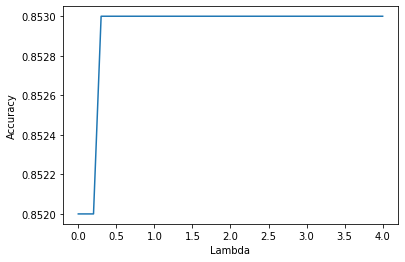

In [199]:
#Plotting the cross-validation accuracy of logistic regression as λ varies.
lambdaa_range = np.arange (0 ,4.1 ,0.1)
max_accuracy_indx = np.argmax(lambdas_accuracies) #Getting the highest index of the highest accuracy
BestLambda = lambdaa_range[max_accuracy_indx]
print ("The best lambda is {0} with an accuracy of {1}".format(BestLambda,lambdas_accuracies[max_accuracy_indx]))
plt.plot (lambdaa_range ,lambdas_accuracies )
plt.xlabel('Lambda')
plt.ylabel('Accuracy')

**Using the 10-fold cross validation --> The best λ is 0.30000000000000004 with an accuracy of 0.853**

In [200]:
W = newton_method(np.concatenate(trains_X),np.concatenate(trains_Y),BestLambda) #getting the weights of our model using the best lambda
predicted_classes_test = predict(np.concatenate(trains_X),W) #predicting the classes for the test set
calculate_accuracy(np.concatenate(trains_Y),predicted_classes_test) #producing the test set accuracy value.

0.892

**Using the best λ I got from the 10-fold cross validation, I calculated the weights then used them to predict the output of the test set, and I got accuracy of 0.892**


In [201]:
#The weights using the best lambda are:
print("w0 = ",W[-1])
print("W = ",W)

w0 =  -0.08461515417218943
W =  [ 0.03107004 -0.02331866 -0.04064158 -0.0057381  -0.05775346 -0.17516564
 -0.04480631 -0.09057395 -0.09666747 -0.00509246 -0.11354418 -0.00556571
 -0.03396302 -0.18792416  0.01727909  0.0299705  -0.06676063 -0.04070107
  0.00329588  0.02701707 -0.01719199  0.10468823  0.03726759 -0.05068606
 -0.08584885 -0.02751252  0.01166596 -0.03341059 -0.09434775 -0.00706834
  0.12245099 -0.03662209 -0.16067019  0.02511596  0.0701451   0.01684709
  0.01094052  0.08189751  0.04287035  0.0518269   0.00917125  0.00703506
  0.22517279  0.09128895  0.01813615 -0.00853016 -0.0187615   0.10926063
 -0.00507564  0.14044241  0.10341677  0.0643681  -0.06083212  0.03959133
  0.08251981  0.01418048  0.05290837  0.0697594  -0.11625292 -0.08323347
  0.02959175  0.07086683  0.01218097 -0.01204009 -0.08461515]
